### importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [2]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv') ### reading data

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## dropping unwanted columns

In [6]:
df = df.drop(columns = ['Unnamed: 0'],axis = 1)

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### statistical description

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### finding correlation 

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


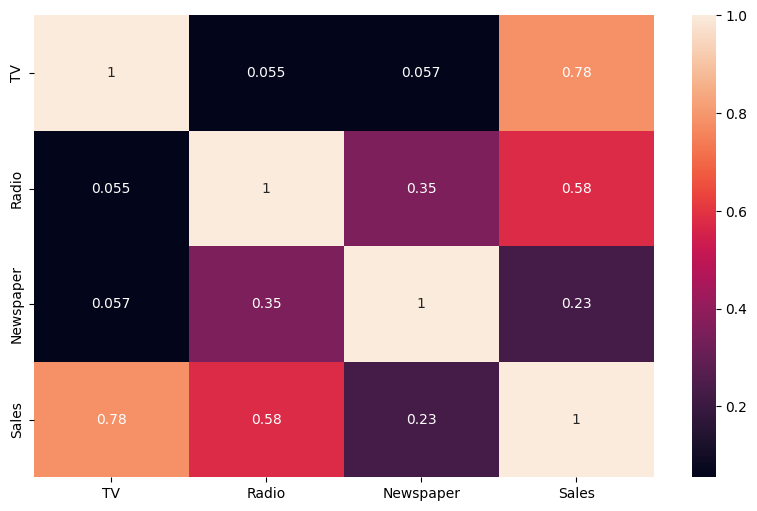

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Univariate analysis

univaraite analysis of sales prediction data tells how much amount is spent on particulary ads

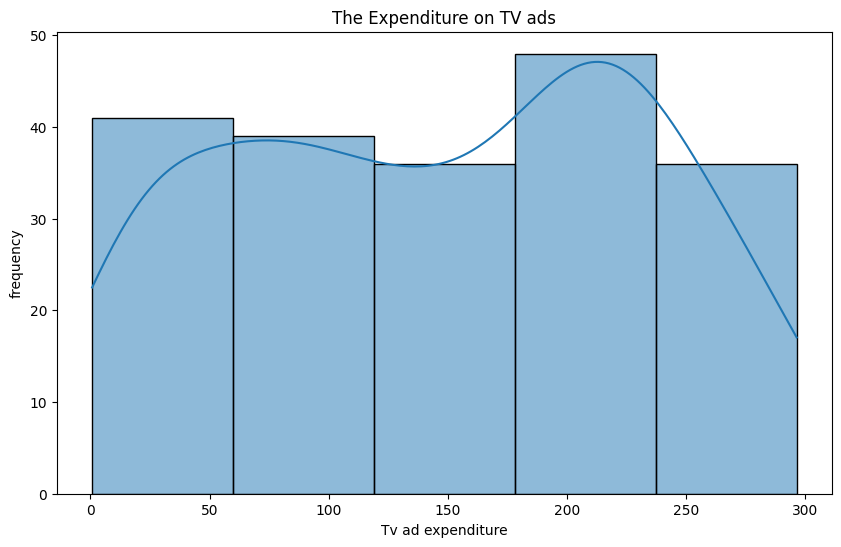

In [11]:
plt.figure(figsize = (10,6))
sns.histplot(df['TV'],bins = 5,kde = True )
plt.title("The Expenditure on TV ads")
plt.xlabel('Tv ad expenditure')
plt.ylabel('frequency')
plt.show()

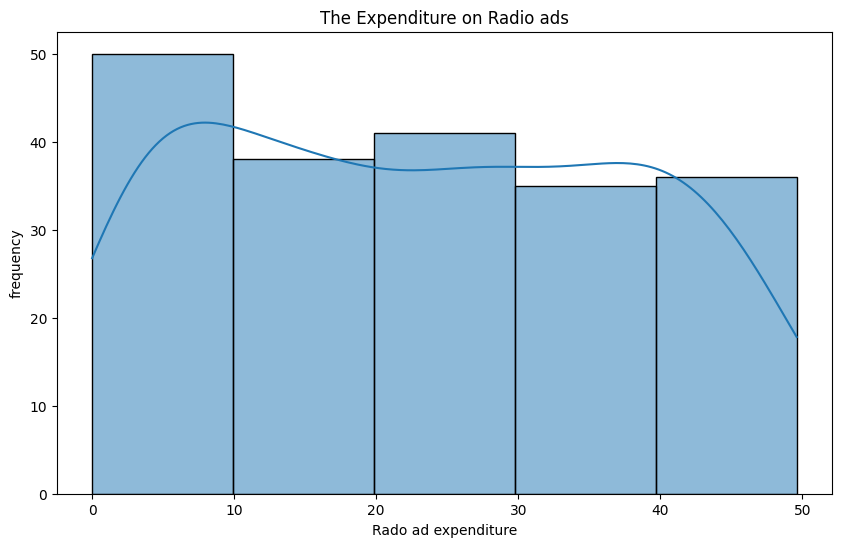

In [12]:
plt.figure(figsize = (10,6))
sns.histplot(df['Radio'],bins = 5,kde = True )
plt.title("The Expenditure on Radio ads")
plt.xlabel('Rado ad expenditure')
plt.ylabel('frequency')
plt.show()

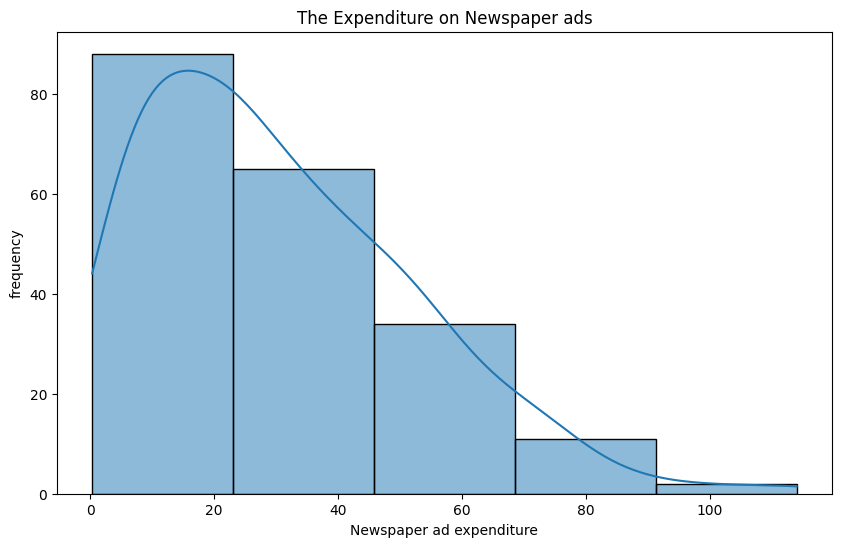

In [13]:
plt.figure(figsize = (10,6))
sns.histplot(df['Newspaper'],bins = 5,kde = True )
plt.title("The Expenditure on Newspaper ads")
plt.xlabel('Newspaper ad expenditure')
plt.ylabel('frequency')
plt.show()

### Bivaraite analysis

This analysis tells how the Target column(sales) affected by other columns in the dataset

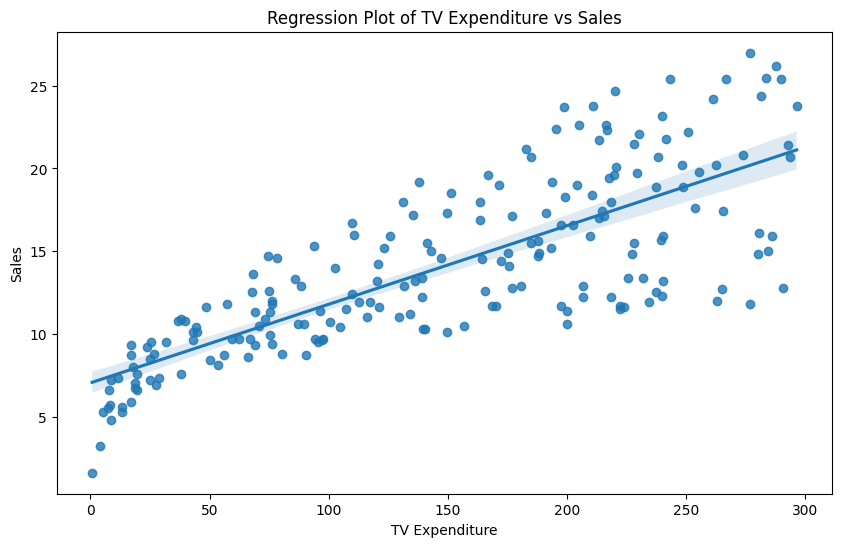

In [14]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='TV', y='Sales', data=df)
plt.title('Regression Plot of TV Expenditure vs Sales')
plt.xlabel('TV Expenditure')
plt.ylabel('Sales')
plt.show()

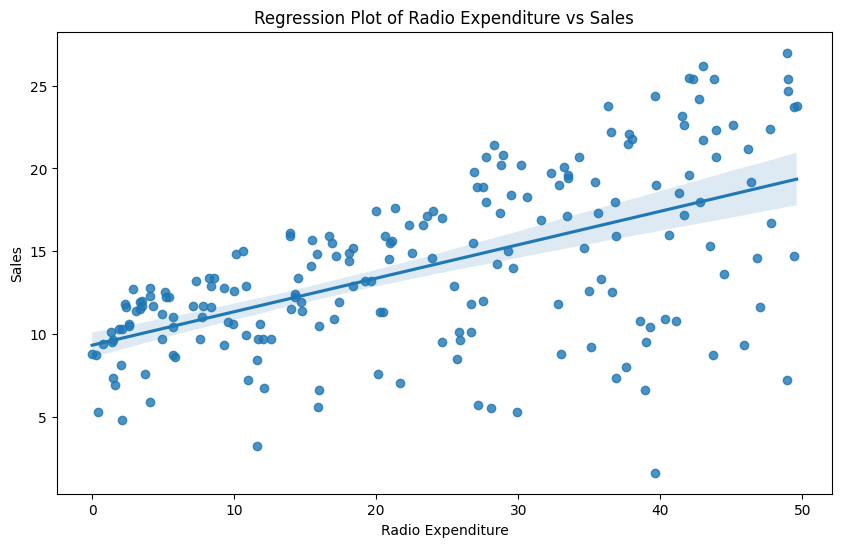

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Radio', y='Sales', data=df)
plt.title('Regression Plot of Radio Expenditure vs Sales')
plt.xlabel('Radio Expenditure')
plt.ylabel('Sales')
plt.show()

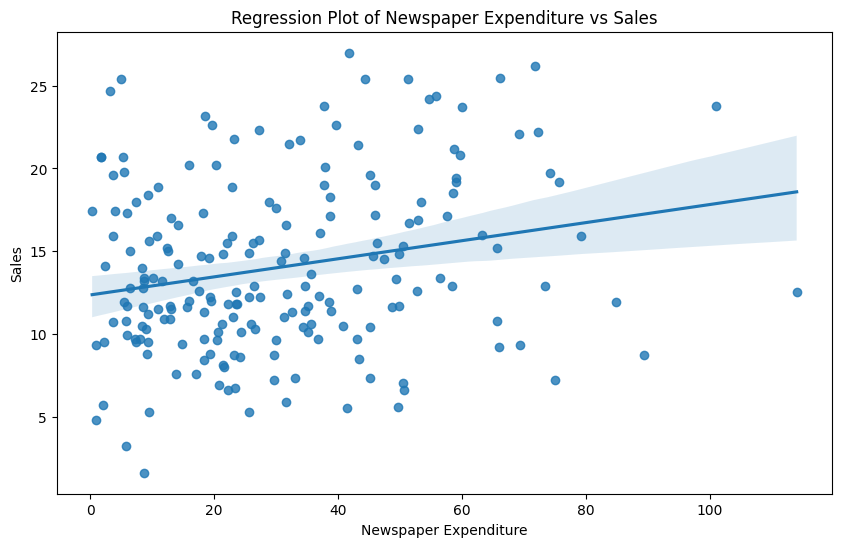

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title('Regression Plot of Newspaper Expenditure vs Sales')
plt.xlabel('Newspaper Expenditure')
plt.ylabel('Sales')
plt.show()

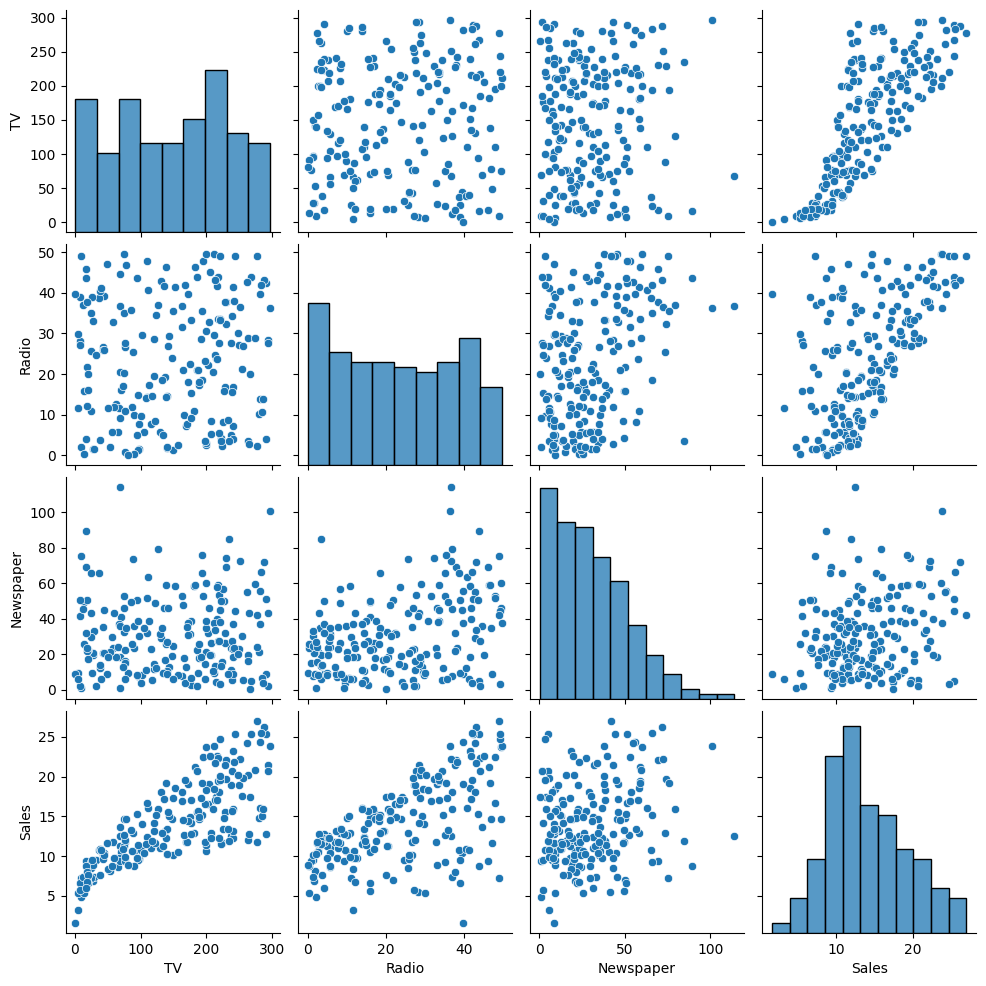

In [17]:
sns.pairplot(df)

In [18]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

In [19]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## splitting the data

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


## standardizing the data

In [23]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

### Building a Regression model 

In [24]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
score_train = r2_score(y_train_pred,y_train)
y_test_pred = model.predict(X_test)
score_test = r2_score(y_test_pred,y_test)
print(f"Training accuracy is : {score_train} \n")
print(f"Test accuracy is :  {score_test} \n")

Training accuracy is : 0.9965727523434597 

Test accuracy is :  0.9824103080537954 

